In [91]:
import numpy as np
from numpy.random import uniform as unif
from matplotlib import pyplot as plt
import math
import pymc as pm

In [92]:
# Samples from banana dist
def banana(x): # x is a 2d array
    x1=x[0]
    x2=x[1]
    p = np.exp(-(x1**2)/2)*np.exp(-((x2-2*(x1**2-5))**2)/2)
    return p

In [93]:
# Metropolis Hastings algorithm
def metropolis(n,w,burnin,thin): # takes in number of iterations, n, jump size, w, and burn-in
    vals = [] # stores accepted draws from distribution
    x=np.array([0.0,0.0])
    vals.append([x[0],x[1]])
    
    for i in range(1,n):
        jump1=unif(-w,w) # jump size for x1
        jump2=unif(-w,w) # jump size for x2
        x_next=np.array([x[0]+jump1,x[1]+jump2]) # candidate draw from distribution
        acceptance_ratio=min(1,banana(x_next)/banana(x))
        u=unif(0,1)
        
        if(u<acceptance_ratio):
            x=x_next # accept and store candidate draw
            vals.append([x[0],x[1]])
    
    return vals[burnin::thin] # return vals w/out burn-in

In [98]:
vals1 = metropolis(70000,0.5,160,15) # run with jump size = 0.5
vals2 = metropolis(70000,1.0,170,10) # jump size = 1
vals3 = metropolis(22000,4.0,10,1) # jump size = 4

In [99]:
pm.raftery_lewis(vals1,q=0.025,r=0.01) # jump size = 0.5


Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 2 required to produce a first-order Markov chain.

18 iterations to be discarded at the beginning of the simulation (burn-in).

5182 subsequent iterations required.

Thinning factor of 8 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

6 iterations to be discarded at the beginning of the simulation (burn-in).

1655 subsequent iterations required.

Thinning factor of 2 required to produce an independence chain.


[(937, 2, 18, 5182, 8), (937, 1, 6, 1655, 2)]

In [100]:
pm.raftery_lewis(vals2,q=0.025,r=0.01) # jump size = 1.0


Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 2 required to produce a first-order Markov chain.

28 iterations to be discarded at the beginning of the simulation (burn-in).

6898 subsequent iterations required.

Thinning factor of 11 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

3 iterations to be discarded at the beginning of the simulation (burn-in).

1005 subsequent iterations required.

Thinning factor of 1 required to produce an independence chain.


[(937, 2, 28, 6898, 11), (937, 1, 3, 1005, 1)]

In [101]:
pm.raftery_lewis(vals3,q=0.025,r=0.01) # jump size = 4.0


Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 2 required to produce a first-order Markov chain.

12 iterations to be discarded at the beginning of the simulation (burn-in).

3576 subsequent iterations required.

Thinning factor of 5 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

3 iterations to be discarded at the beginning of the simulation (burn-in).

1057 subsequent iterations required.

Thinning factor of 1 required to produce an independence chain.


[(937, 2, 12, 3576, 5), (937, 1, 3, 1057, 1)]

In [102]:
# Test convergence using Geweke test
# Takes first 10% and last 50% of chain, breaks last 50% into a number of segments and outputs
# z-scores comparing each of these segments to the first 10%

# For jump size = 0.5

scores1=pm.geweke(vals1) 
pm.Matplot.geweke_plot(scores1, "geweke1")

In [103]:
# For jump size = 1.0

scores2=pm.geweke(vals2)
pm.Matplot.geweke_plot(scores2, "geweke2")

In [104]:
# For jump size = 2.0

scores3=pm.geweke(vals3)
pm.Matplot.geweke_plot(scores3, "geweke3")

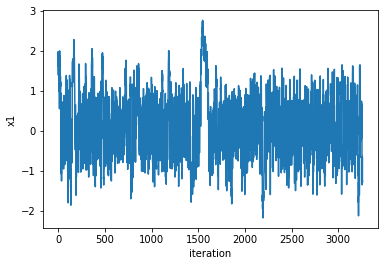

In [106]:
# Test mixing using trace plots

# For jump size = 0.5
x1_vals1 = [item[0] for item in vals1] # extract x1 values from MH path
plt.plot(x1_vals1) # plot x1 values
plt.xlabel('iteration') # label x and y axes
plt.ylabel('x1')
plt.show() # show plot

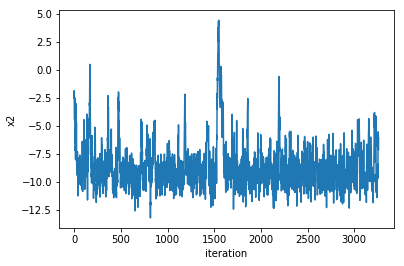

In [107]:
x2_vals1 = [item[1] for item in vals1] # extract x2 values from MH path
plt.plot(x2_vals1) # plot x2 values
plt.xlabel('iteration') # label x and y axes
plt.ylabel('x2')
plt.show() # show plot

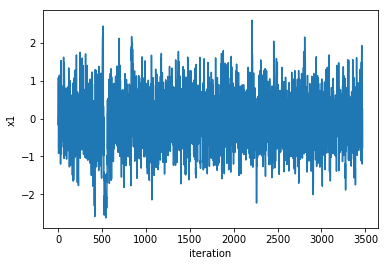

In [108]:
# For jump size = 1.0

x1_vals2 = [item[0] for item in vals2]
plt.plot(x1_vals2)
plt.xlabel('iteration')
plt.ylabel('x1')
plt.show()

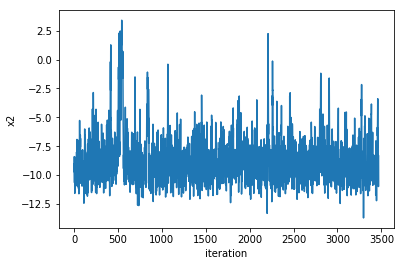

In [109]:
x2_vals2 = [item[1] for item in vals2]
plt.plot(x2_vals2)
plt.xlabel('iteration')
plt.ylabel('x2')
plt.show()

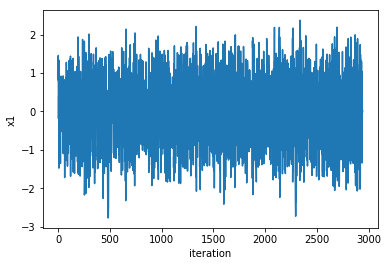

In [110]:
# For jump size = 2.0

# Trace x1 values
x1_vals3 = [item[0] for item in vals3]
plt.plot(x1_vals3)
plt.xlabel('iteration')
plt.ylabel('x1')
plt.show()

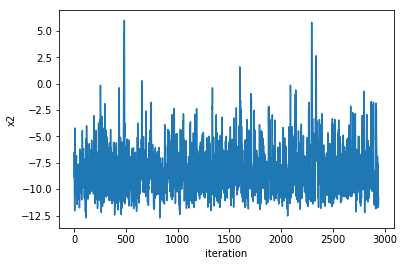

In [111]:
# Trace x2 values

x2_vals3 = [item[1] for item in vals3]
plt.plot(x2_vals3)
plt.xlabel('iteration')
plt.ylabel('x2')
plt.show()

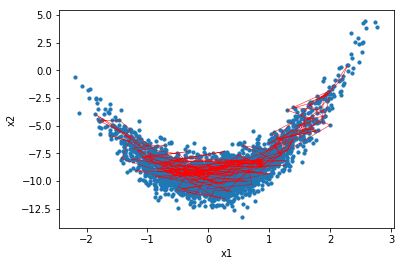

In [112]:
# Plot of x1 vs. x2 for part ii, w=0.5
# Superimposed path for 200 iterations
vals1_200=vals1[:200] # extract MH path for first 200 iterations
vals1_200_t=np.transpose(vals1_200) # transpose of 200 iterations
vals1_t=np.transpose(vals1) # transpose of all iterations

plt.plot(vals1_200_t[0],vals1_200_t[1],"r-",linewidth=0.5) # trace of first 200 iterations
plt.scatter(vals1_t[0],vals1_t[1],s=10) # scatter plot of all iterations
plt.xlabel('x1') # label x and y axes
plt.ylabel('x2')
plt.show() # display plot

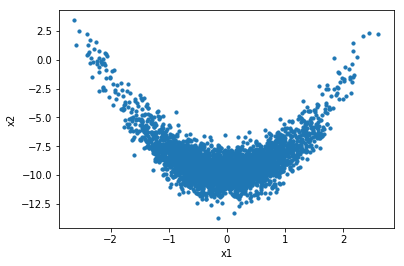

In [113]:
# Plot of x1 vs. x2 for part ii, w=1.0
vals2_t=np.transpose(vals2)

plt.scatter(vals2_t[0],vals2_t[1],s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

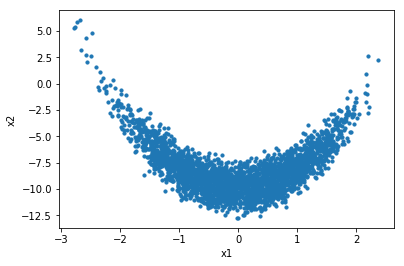

In [114]:
# Plot of x1 vs. x2 for part ii, w=2.0
vals3_t=np.transpose(vals3)

plt.scatter(vals3_t[0],vals3_t[1],s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()